In [1]:
# root para fazer download dos dados
import uproot

# numpy para manipulação dos vetores
import numpy as np
from itertools import chain
from itertools import zip_longest
import pandas as pd

# plotagem
import matplotlib.pyplot as plt
import seaborn as sns

# para resolver a integral
import sympy

import yaml

# https://root.cern/manual/python/

In [2]:
import ROOT

In [2]:
conf = yaml.load(open('config.yml'), Loader=yaml.FullLoader)

# Exercício 1

In [3]:
## p0 * sin (p1 * x) / x
# definindo a função:

def f(x, p0, p1):
    return p0 * np.sin(p1 * x) / x

# para os valores de x:

x = np.linspace(0.1, 10, 1000)



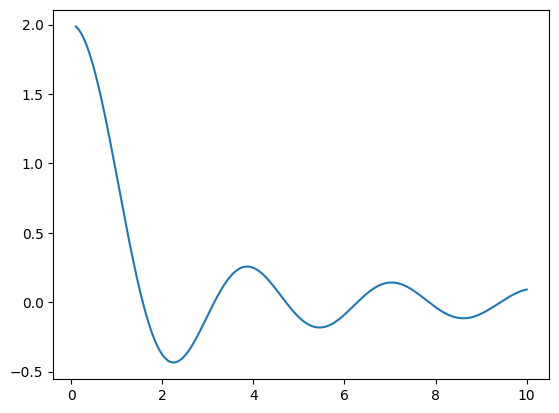

In [4]:
p0 = 1
p1 = 2
plt.plot(x, f(x, p0, p1))

In [5]:
# integral

x = sympy.Symbol('x')
p0 = sympy.Symbol('p0')
p1 = sympy.Symbol('p1')

integral = sympy.integrate(1 * sympy.sin(2 * x) / x, (x, 0, 3))

In [6]:
integral.evalf()

1.42468755128051

In [7]:
# onde "Si" é a integral do seno

Exercício 2:

Plotar gŕafico de erro

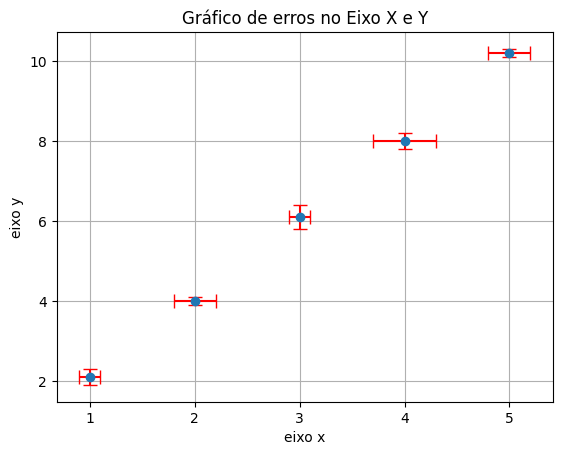

In [8]:
x = [1, 2, 3, 4, 5]             
y = [2.1, 4.0, 6.1, 8.0, 10.2]  
x_err = [0.1, 0.2, 0.1, 0.3, 0.2]  
y_err = [0.2, 0.1, 0.3, 0.2, 0.1] 

plt.errorbar(x, y, xerr=x_err, yerr=y_err, fmt='o', ecolor='red', capsize=5)
plt.xlabel('eixo x')
plt.ylabel('eixo y')
plt.title('Gráfico de erros no Eixo X e Y')
plt.grid(True)
plt.show()  


# Exercício 3:

In [9]:
from scipy.stats import skew, kurtosis

In [10]:
mu = 5
sigma = 2

data = np.random.normal(mu, sigma, 10000)

mean = np.mean(data)
underflow_value = 0
overflow_value = 10
skew_value = skew(data)
kurtosis_value = kurtosis(data)
# RMS = root mean square
rms = np.sqrt(np.mean(data**2))
# integral do histograma??


In [11]:
msg = f"""
total de eventos: {len(data)}
média: {mean}
underflow: {underflow_value}
qtd abaixo do underflow: {len(data[data < underflow_value])}
overflow: {overflow_value}
qtd acima do overflow: {len(data[data > overflow_value])}
skew: {skew_value}
kurtosis: {kurtosis_value}
rms: {rms}

"""
print(msg)


total de eventos: 10000
média: 5.012364876278173
underflow: 0
qtd abaixo do underflow: 63
overflow: 10
qtd acima do overflow: 81
skew: 0.011904470957568605
kurtosis: 0.06765146338967343
rms: 5.396172867157279




<Axes: ylabel='Count'>

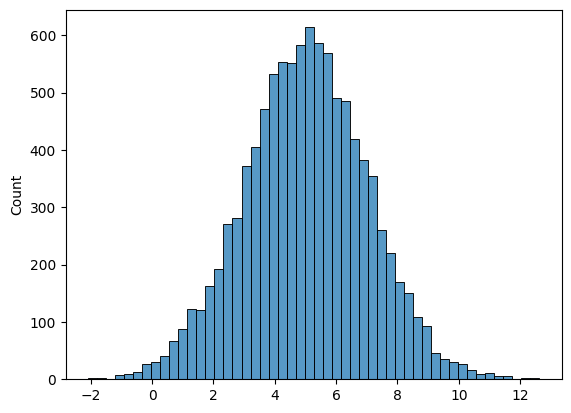

In [12]:
sns.histplot(data, bins=50)

In [13]:
file = uproot.open(conf['root_url'])

In [14]:
array = file['Events;1']['Muon_pt'].array(library='np')
array_err = file['Events;1']['Muon_ptErr'].array(library='np')

In [15]:
# mínimo 2 elementos

In [16]:
array

array([array([], dtype=float32), array([], dtype=float32),
       array([], dtype=float32), ..., array([], dtype=float32),
       array([3.8626924], dtype=float32),
       array([114.64467 ,  31.132769,  18.414816], dtype=float32)],
      dtype=object)

In [17]:
#       ISSO REMOVE OS VETORES VAZIOS
array = np.concatenate(array)
array_err = np.concatenate(array_err)

In [18]:
array

array([ 16.022831,  40.555103,  34.59234 , ..., 114.64467 ,  31.132769,
        18.414816], dtype=float32)

In [19]:
file.keys()

['tag;1',
 'Events;1',
 'LuminosityBlocks;1',
 'Runs;1',
 'MetaData;1',
 'ParameterSets;1']

In [20]:
file['Runs;1'].typenames()

{'run': 'uint32_t',
 'genEventCount': 'int64_t',
 'genEventSumw': 'double',
 'genEventSumw2': 'double',
 'nLHEScaleSumw': 'uint32_t',
 'LHEScaleSumw': 'double[]',
 'nLHEPdfSumw': 'uint32_t',
 'LHEPdfSumw': 'double[]'}

In [21]:
# Muon_ptErr

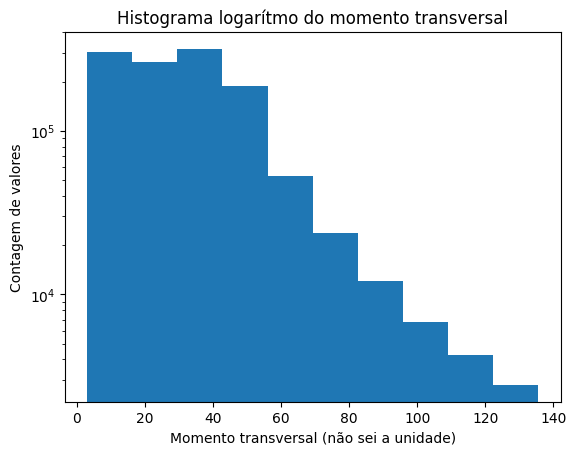

In [22]:
plt.hist(array, range=(min(array), np.quantile(array, 0.99)), log=True)
plt.title("Histograma logarítmo do momento transversal")
plt.xlabel("Momento transversal (não sei a unidade)")
plt.ylabel("Contagem de valores")
plt.show()

Exercício 4 (?):

In [23]:
array_filtrado = array[array_err > 0.2]

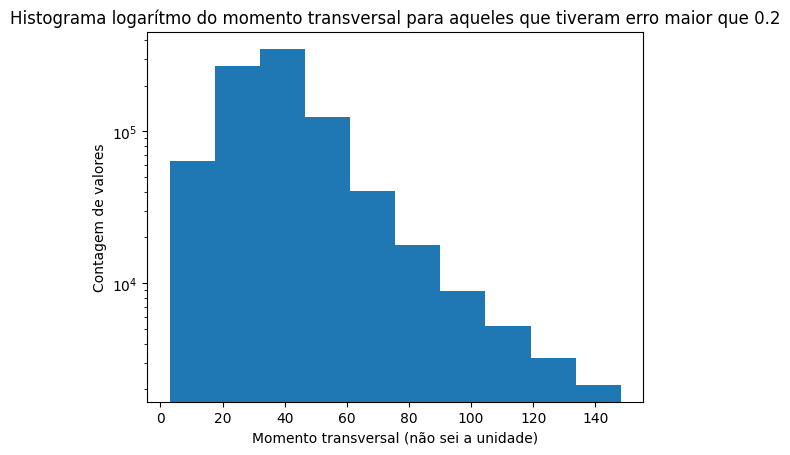

In [24]:
plt.hist(array_filtrado, range=(min(array_filtrado), np.quantile(array_filtrado, 0.99)), log=True)
plt.title("Histograma logarítmo do momento transversal para aqueles que tiveram erro maior que 0.2")
plt.xlabel("Momento transversal (não sei a unidade)")
plt.ylabel("Contagem de valores")
plt.show()

eventos que há dois múons

massa invariante dos dois primeiros múons do evento

root -> T vector lorents 

pt phi eta

para cada row 1 vetor

somar esses vetores

In [25]:
array

array([ 16.022831,  40.555103,  34.59234 , ..., 114.64467 ,  31.132769,
        18.414816], dtype=float32)

# Extra

https://github.com/scikit-hep/vector


In [4]:
import vector

In [27]:
array = file['Events;1']['Muon_pt'].array(library='np')
Muon_phi = file['Events;1']['Muon_phi'].array(library='np')
Muon_eta = file['Events;1']['Muon_eta'].array(library='np')

In [28]:
# file['Events;1'].typenames()

In [29]:
def to_matrix(vector: np.ndarray[np.ndarray[np.float32]], filter: int = 2) -> np.ndarray:
    lengths = np.array([len(a) for a in vector]) # tamanhos
    result = np.full((len(array), np.max(lengths)), np.nan)
    col_indices = np.tile(np.arange(np.max(lengths)), (len(array), 1))
    mask = col_indices < lengths[:, None]
    result[mask] = np.concatenate(vector)
    non_nan_counts = np.sum(~np.isnan(result), axis=1)
    filtered_result = result[non_nan_counts >= filter]
    return filtered_result

In [30]:
to_matrix(array)

array([[ 40.5551033 ,  34.59233856,          nan, ...,          nan,
                 nan,          nan],
       [ 35.13299179,  32.69950867,          nan, ...,          nan,
                 nan,          nan],
       [ 31.84059525,  31.21387291,          nan, ...,          nan,
                 nan,          nan],
       ...,
       [ 57.89455032,  44.45767593,  39.66168213, ...,          nan,
                 nan,          nan],
       [ 40.92528534,  35.73157883,          nan, ...,          nan,
                 nan,          nan],
       [114.64466858,  31.13276863,  18.4148159 , ...,          nan,
                 nan,          nan]])